### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy stat. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge p 

#### The company wants to know:
- 
Which variables are significant in predicting the demand for shared bikes- .
How well those variables describe the bike dema
  nds
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factor

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a . s. ofits.



## <font color = 'orange'> Below steps will be followed for the Bike Sharing model Assignment </font>
- Step 1: Reading, understand & cleanup and visualizing the data
- Step 2: Preparing the data for modeling (train-test split, rescaling)
- Step 3: Training the model - VIF & p-value analysis
- Step 4: Residual Analysis
- Step 5: Prediction and evaluation on the test set
- Step 6: Model Analysis

### <font color = 'orange'> Step 1: Reading, understand & cleanup and visualizing the data </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn                                         # To use sklearn library
from   sklearn.model_selection import train_test_split # To split train and test dataset
from   sklearn.preprocessing import MinMaxScaler       # To Scale the numerical variables
import statsmodels.api as sm
from   statsmodels.stats.outliers_influence import variance_inflation_factor  # To find the VIF factor for Features
from   sklearn.metrics import r2_score                 # To find the r-square score


from sklearn.linear_model import LinearRegression      # Importing LinearRegression to be used by RFE
from sklearn.feature_selection import RFE              # To calculate RFE

import warnings                                        # To supress warnings
warnings.filterwarnings('ignore')                      # To 'ignore' the warning messages


### Reading data file

In [2]:
bike_df=pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check the size of the data set
bike_df.shape

(730, 16)

In [7]:
# Based on the Data Dictionary 
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
# All of the columns have data type as'int' or 'float'. Througout the Notebook columns / Predictor variables / Features are used intrchangably.
# Many columns / Predictor variables / Features look like catgorical variables, hence needs to be converted. 

### Understand and Cleanup the Data

In [13]:
# Checking if the dtaa has any null value
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### From null value prospective data looks good. Theres are no missing values in the dataframe, which needs to be filled or cleaned.

In [15]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [17]:
# Let us inspect individual column values and understand the data type.
for column in bike_df:
    print(bike_df[column].value_counts(),'\n')

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64 

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 

yr
0    365
1    365
Name: count, dtype: int64 

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 

holiday
0    709
1     21
Name: count, dtype: int64 

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 

workingday
1    499
0    231
Name: count, dtype: int64 

weathersit
1    463
2    246
3     21
Name: count, dtype: int64 

temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
           

#### Identify columns which are not required for the model and analysis
- 'instant' column is an index column and is not required for model.
- 'dteday' is a date column and 'mnth' and 'yr' columns cover the time dependencydoes. 'dteday' column can be removed.
- 'Casual' and 'Registered' are derived from 'cnt' based on the non-registered and registered users, analysis is not required for 
   registered or unregistered user, so these columsn can be removed.

In [19]:
bike_df = bike_df.drop(['instant','dteday','casual','registered'],axis=1)

### Visualize the data
Data has different columns. Many of those are numerical but some of these are 'Categorical' in nature. We need or segragate the 
numerical an categorical columns before visualization.
- 'temp', 'atemp', 'hum', 'windspeed' and 'cnt' are numerical columns
- 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', and 'weathersit' are categorical in nature, even though the values of many of these
  columns are numerical.

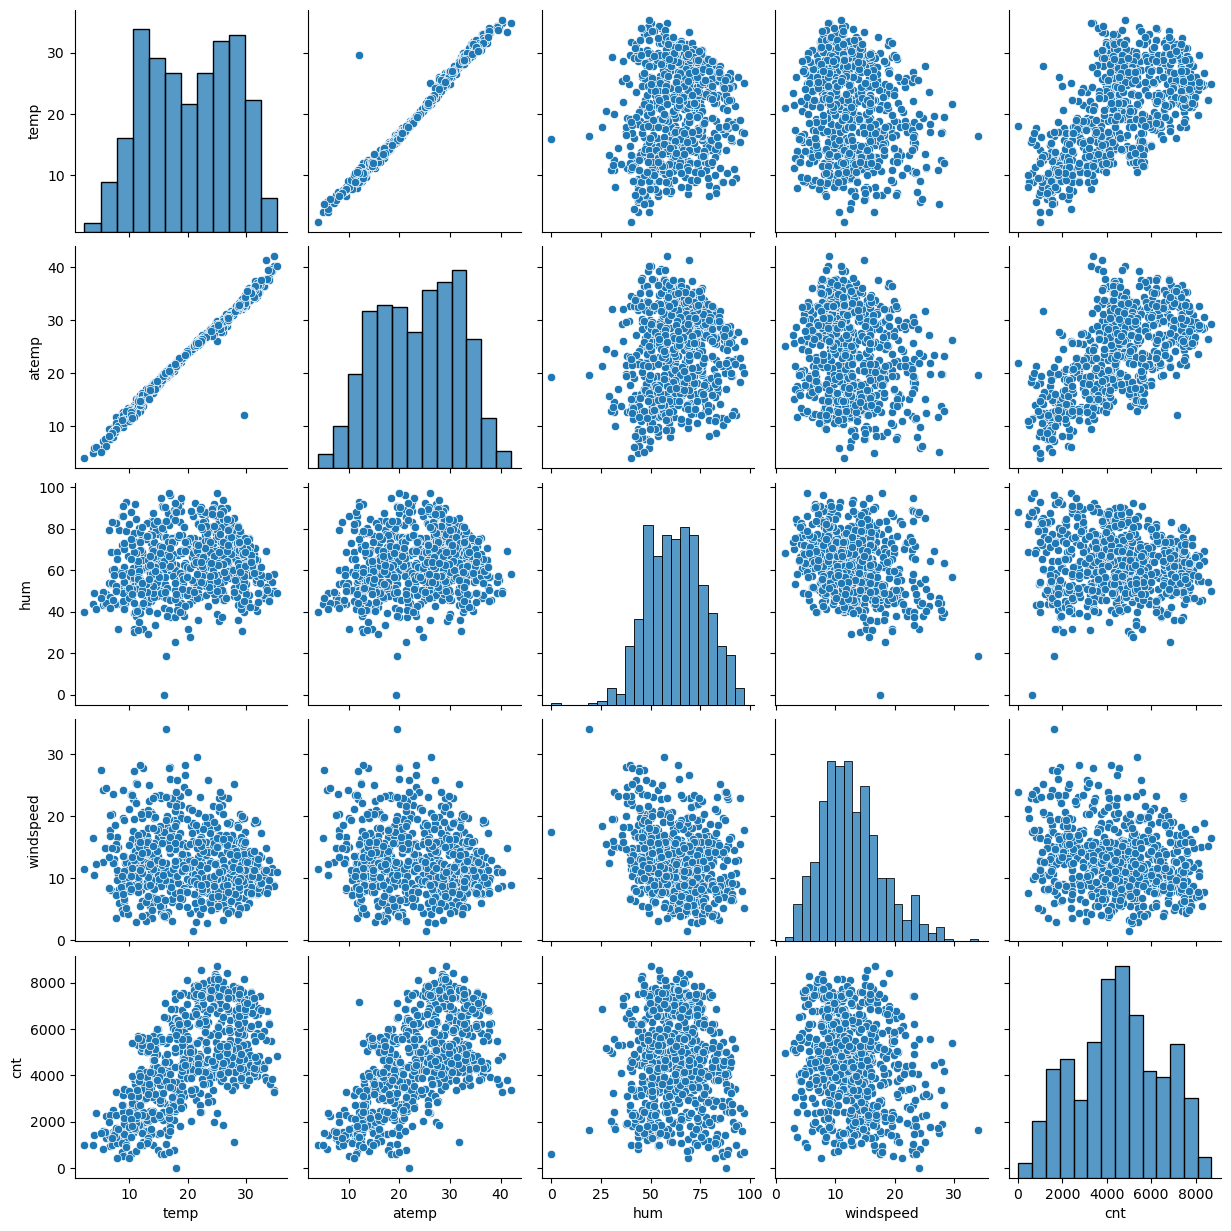

In [21]:
# Let us segregare the numerical columns and find relation between these columns to find an linear trend.

num_cols = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bike_df[num_cols])
plt.show()

#### Based on the analysis of pairplots between above numberic variables, below ae the finding.
- There is clearly a strong correlation between 'cnt' and 'temp', 'atemp'.
- 'hum' and 'windspeed' seems to have some correlation with 'cnt'. 


This can be validated later using the heat map as well.

In [ ]:
# Now, let us analyse characteristic columns vs count one by one. 

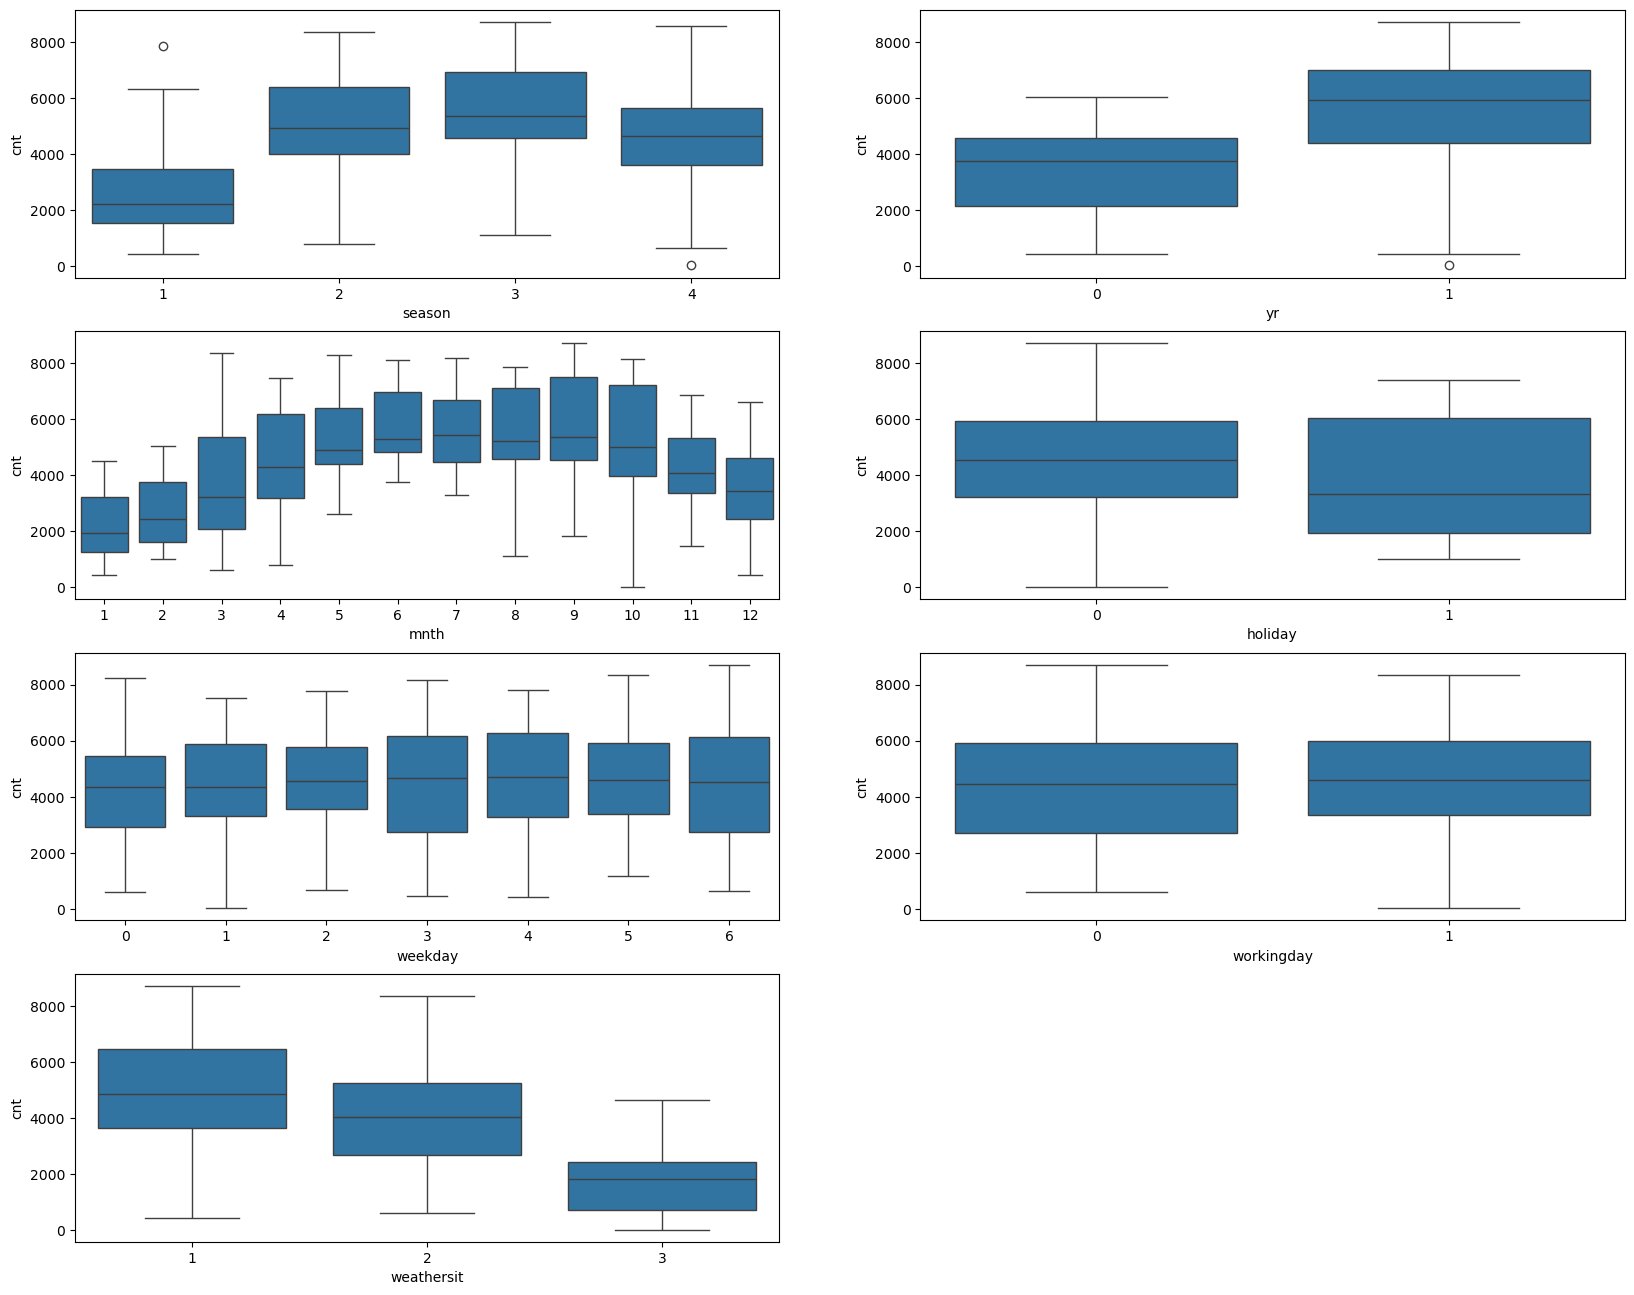

In [23]:
# Season, year, month, holiday, weekday, workingday, holiday and weathersit vs count
plt.figure(figsize = (20,16))

plt.subplot(4,2,1)
sns.boxplot(data=bike_df,x='season',y='cnt')

plt.subplot(4,2,2)
sns.boxplot(data=bike_df,x='yr',y='cnt')

plt.subplot(4,2,3)
sns.boxplot(data=bike_df,x='mnth',y='cnt')

plt.subplot(4,2,4)
sns.boxplot(data=bike_df,x='holiday',y='cnt')

plt.subplot(4,2,5)
sns.boxplot(data=bike_df,x='weekday',y='cnt')

plt.subplot(4,2,6)
sns.boxplot(data=bike_df,x='workingday',y='cnt')

plt.subplot(4,2,7)
sns.boxplot(data=bike_df,x='weathersit',y='cnt')

plt.show()

In [ ]:
# Subplots shows that variance of 'cnt' with respect to values of different catogorical variable values

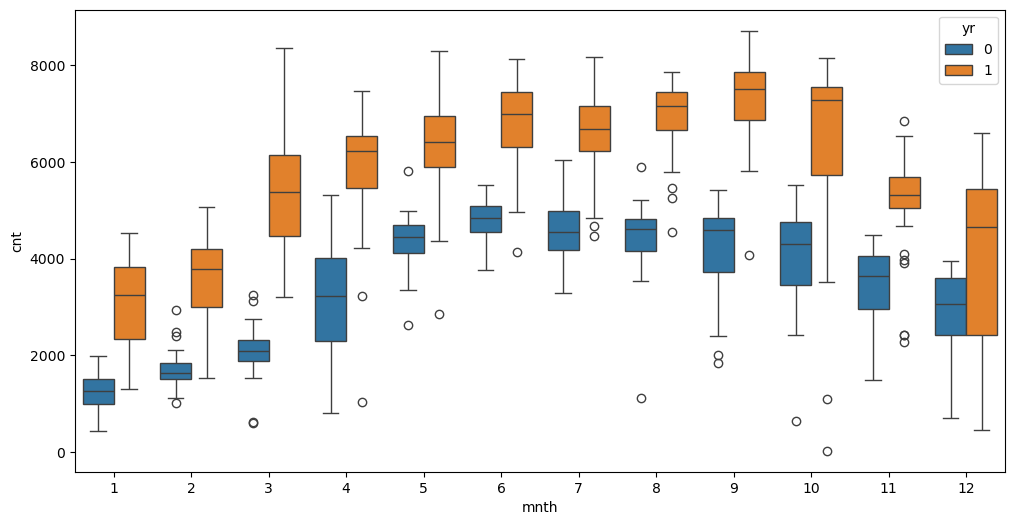

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=bike_df, x='mnth',y='cnt',hue='yr')
plt.show()

In [1]:
# Above Box plot with 'yr' and 'mnth' with 'cnt' shows that in year 2019 every month has a higher demand of bike.

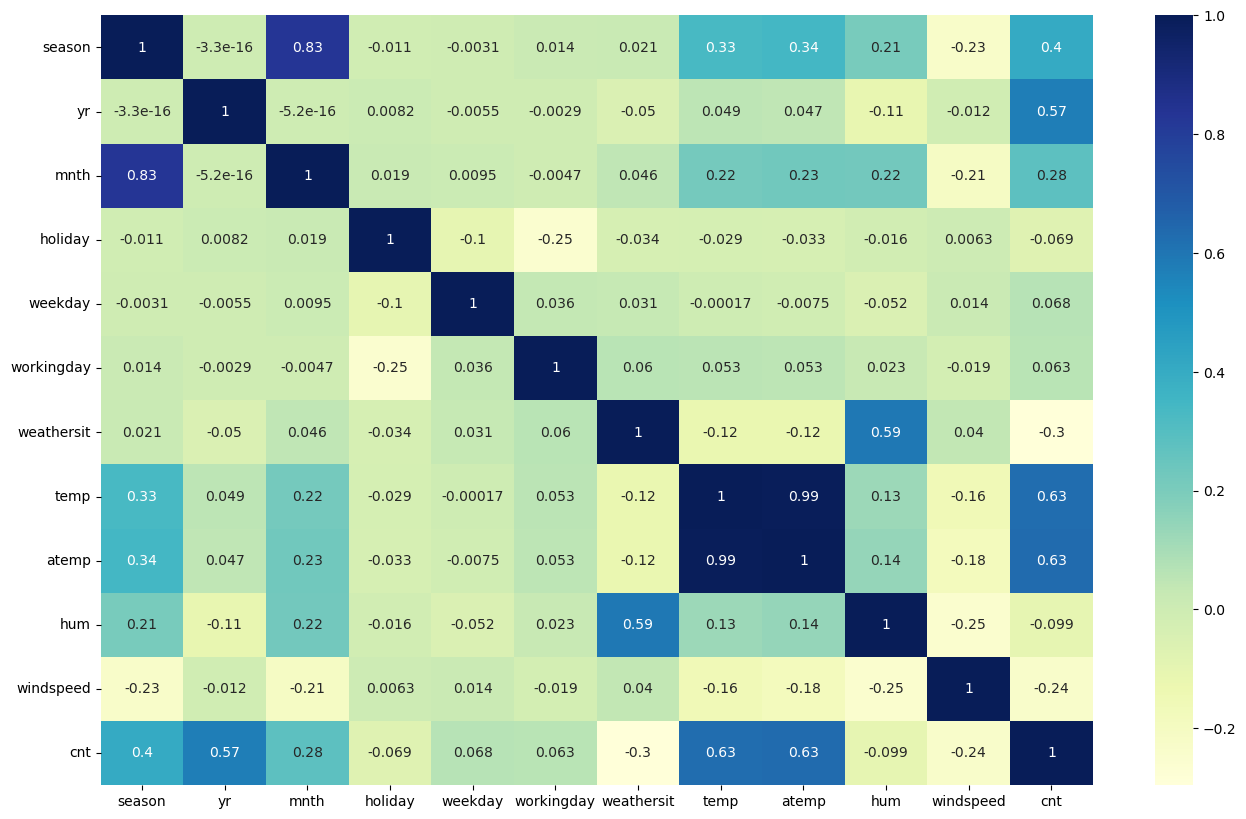

In [29]:
# Let us check the correlation 
plt.figure(figsize=(16,10))
sns.heatmap(bike_df.corr(),annot=True, cmap='YlGnBu')
plt.show()

#### Based on the analysis of Heatmap above below is the observation.
- There is clearly a strong correlation for `cnt` with `temp`, `atemp`, `yr`, `mnth`, `season` and `weathersit`.
- `hum` has the weekest correlation with `cnt`, followed by `holiday`, `weekday` and `workingday`.


### <font color = 'orange'> Step 2: Preparing the data for modeling (train-test split, rescaling) </font>

In [31]:
# Let us prepare the features for modeling.
# As you know that `season`, 'weathersit`, `weekday` and `mnth` varaible have more than 2 values, we need to create dummy varaibles 
# for those catgorical values. Before we do that, we need to convert these fields to Categorical data type. 

# Check the current data types of the variables/

bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [33]:
# Converting Datatype to 'Category'

bike_df['season'] = bike_df['season'].astype('category')
bike_df['mnth'] = bike_df['mnth'].astype('category')
bike_df['weekday'] = bike_df['weekday'].astype('category')
bike_df['weathersit'] = bike_df['weathersit'].astype('category')


In [35]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [37]:
# Create dummy variablw now.
bike_df = pd.get_dummies(bike_df, drop_first=True, dtype='int')

In [39]:
# Check the updated sturcture of the DataFrame.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    int32  
 9   season_3      730 non-null    int32  
 10  season_4      730 non-null    int32  
 11  mnth_2        730 non-null    int32  
 12  mnth_3        730 non-null    int32  
 13  mnth_4        730 non-null    int32  
 14  mnth_5        730 non-null    int32  
 15  mnth_6        730 non-null    int32  
 16  mnth_7        730 non-null    int32  
 17  mnth_8        730 non-null    int32  
 18  mnth_9        730 non-null    

In [41]:
print(bike_df.head())

   yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0         0         0  ...        0        0          0          0          0   
1         0         0  ...        0        0          0          0          0   
2         0         0  ...        0        0          1          0          0   
3         0         0  ...        0        0          0          1          0   
4         0         0  ...        0        0          0          0          1   

   weekday_4  weekday_5  weekday_6  weathersit_2  

#### Splitting the data in traina and test sets
- Keeping the `70%` data for training and leaving 30% for testing
- Using random state as a randomg fix number `42`

In [43]:
# We are going to split teh data now into train and test set.
bike_train, bike_test = train_test_split(bike_df, train_size = 0.75, random_state = 42)

In [45]:
# Check the shape of train and test sets
print(bike_train.shape)
print(bike_test.shape)

(547, 30)
(183, 30)


#### Scaling the numeric values

In [47]:
# train and test data  sets should be rescaled now. 

# Initialize the MonMaxScaler() class
bike_scale = MinMaxScaler()

In [49]:
# Let us check what is the values before scalling. We can see the values after the scaling.
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
668,1,0,1,14.657500,18.0550,66.6667,11.166689,5566,0,0,...,0,0,0,0,1,0,0,0,1,0
694,1,0,1,12.846653,16.9502,53.5417,3.125550,5087,0,0,...,1,0,1,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.1646,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
18,0,0,1,11.979134,14.9211,74.1739,13.957239,1650,0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
# Scaling is used for numerical variables. Let us scale the numberical variables. 
bike_train[num_cols] = bike_scale.fit_transform(bike_train[num_cols])

In [53]:
# Check the values after scaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.400324,0.857540,0,0,...,0,0,0,1,0,0,0,0,0,0
668,1,0,1,0.371783,0.370203,0.686990,0.361366,0.619944,0,0,...,0,0,0,0,1,0,0,0,1,0
694,1,0,1,0.316749,0.341199,0.551739,0.060760,0.562115,0,0,...,1,0,1,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.567625,0.336444,0.462996,0,1,...,0,0,1,0,0,0,0,0,0,0
18,0,0,1,0.290384,0.287930,0.764351,0.465686,0.147169,0,0,...,0,0,0,0,1,0,0,0,1,0


In [55]:
bike_train.shape

(547, 30)

#### Apply `RFE` (Recursive Feature Elimination) method 
- RFE is applied to optimally find the best suitable features for the model. 

In [57]:
# As you know that the number of columns are 30, it would be a good idea to get apply RFE to find the most suitable 
# independent variables.

# Divinding train set into X and y sets. y_train shall have only the Target variable and X_train should have all the independent Feature variables
y_train = bike_train.pop('cnt')
X_train = bike_train

In [59]:
# Let us initialize the LinearRegression() class to be used by RFE Feature Selection method.

bike_lr = LinearRegression()

In [61]:
# Fit the X_traina nd y_train in Linear Regression
bike_lr.fit(X_train, y_train)

LinearRegression()

In [63]:
# We need to agree on how many number of Features do we consider for analyse against the Target variable. 
# Let us consider top 15 Features which we want to start with. Apply RFE for 15 features variables.

# Initialize RFE 
rfe = RFE(estimator=bike_lr,n_features_to_select=15)


In [65]:
# Apply fit for RFE for the train set.
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', False, 4),
 ('mnth_4', False, 11),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', True, 1),
 ('mnth_8', False, 14),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 13),
 ('weekday_4', False, 15),
 ('weekday_5', False, 12),
 ('weekday_6', False, 2),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [69]:
# Pick up the columns as a result of the RFE.
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_7', 'mnth_9', 'mnth_11', 'mnth_12',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [71]:
# Below columns are ommitted as a result of the RFE exercise
print(X_train.columns[~rfe.support_])

Index(['workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_8', 'mnth_10', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')


#### Build and train the model based on the final list of Predictor variables/Features

In [73]:
# Create a DataFrame to have the final train set columns/Features/Predictor Variables
X_train_rfe = X_train[cols]

In [75]:
# Check the content of the final train set
X_train_rfe.head()

,yr,holiday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_7,mnth_9,mnth_11,mnth_12,weathersit_2,weathersit_3
653,1,0,0.509887,0.501133,0.575354,0.400324,0,0,1,0,0,0,0,0,0
668,1,0,0.371783,0.370203,0.686990,0.361366,0,0,1,0,0,0,0,1,0
694,1,0,0.316749,0.341199,0.551739,0.060760,0,0,1,0,0,1,0,0,0
212,0,0,0.887856,0.819376,0.567625,0.336444,0,1,0,0,0,0,0,0,0
18,0,0,0.290384,0.287930,0.764351,0.465686,0,0,0,0,0,0,0,1,0


### <font color = 'orange'> Step 3: Train the model, VIF & p-value analysis </font>

#### Train the first model

In [77]:
# Add the constant to the train set

X_train_lm1 = sm.add_constant(X_train_rfe)

In [79]:
# Create the linear Stats model and fit it

bike_lm1 = sm.OLS(y_train, X_train_lm1).fit()

In [81]:
print(bike_lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.5
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          2.37e-200
Time:                        09:13:09   Log-Likelihood:                 519.96
No. Observations:                 547   AIC:                            -1008.
Df Residuals:                     531   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1877      0.030      6.325   

#### Calculate Variance Inflation factor `VIF`  for all Predictor variables to check the multicollinearity for Model 1

- r-squared is `0.840 which is very good.
- Before removing high p-value variables, you need to find the VIF value, which determines the multicollinearity between the predictor
  variables.

In [83]:
# Initialize a dataframe a dataFrame for VIF and add all columns to it
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

In [85]:
# For every Predictor variable, calculate the VIF
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

In [87]:
# Round the values upto 2 decimal and sort the VIF values. 
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features      VIF
3          atemp  1288.89
2           temp  1276.27
4            hum    17.95
7       season_3     7.91
5      windspeed     4.90
8       season_4     4.15
6       season_2     4.03
13  weathersit_2     2.14
0             yr     2.04
11       mnth_11     1.96
9         mnth_7     1.86
10        mnth_9     1.52
12       mnth_12     1.42
14  weathersit_3     1.25
1        holiday     1.05


#### Analysis of VIF - Model 1
- VIF for `atemp` is 1288.89 which is very high. 
- You should remove `atemp`, variable and recreate model.

In [89]:
X_train_lm1.head()

,const,yr,holiday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_7,mnth_9,mnth_11,mnth_12,weathersit_2,weathersit_3
653,1.0,1,0,0.509887,0.501133,0.575354,0.400324,0,0,1,0,0,0,0,0,0
668,1.0,1,0,0.371783,0.370203,0.686990,0.361366,0,0,1,0,0,0,0,1,0
694,1.0,1,0,0.316749,0.341199,0.551739,0.060760,0,0,1,0,0,1,0,0,0
212,1.0,0,0,0.887856,0.819376,0.567625,0.336444,0,1,0,0,0,0,0,0,0
18,1.0,0,0,0.290384,0.287930,0.764351,0.465686,0,0,0,0,0,0,0,1,0


In [91]:
X_train_rfe = X_train_rfe.drop("atemp", axis=1)

In [93]:
print(X_train_rfe.head())

     yr  holiday      temp       hum  windspeed  season_2  season_3  season_4  \
653   1        0  0.509887  0.575354   0.400324         0         0         1   
668   1        0  0.371783  0.686990   0.361366         0         0         1   
694   1        0  0.316749  0.551739   0.060760         0         0         1   
212   0        0  0.887856  0.567625   0.336444         0         1         0   
18    0        0  0.290384  0.764351   0.465686         0         0         0   

     mnth_7  mnth_9  mnth_11  mnth_12  weathersit_2  weathersit_3  
653       0       0        0        0             0             0  
668       0       0        0        0             1             0  
694       0       0        1        0             0             0  
212       0       0        0        0             0             0  
18        0       0        0        0             1             0  


#### Train the 2nd model after revoing `atemp`

In [95]:
# Create the second model - Add constant and apply ordinary least squares method and fit the train dataset to train the model
X_train_lm2 = sm.add_constant(X_train_rfe)
bike_lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [97]:
print(bike_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          3.97e-201
Time:                        09:14:11   Log-Likelihood:                 519.05
No. Observations:                 547   AIC:                            -1008.
Df Residuals:                     532   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1912      0.030      6.465   

In [99]:
# Let us calculate the VIF for the variables in model 2
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)


In [101]:
print(vif)

        Features    VIF
2           temp  26.25
3            hum  16.46
6       season_3   7.85
4      windspeed   4.54
7       season_4   4.13
5       season_2   4.01
12  weathersit_2   2.10
0             yr   2.04
10       mnth_11   1.95
8         mnth_7   1.86
9         mnth_9   1.52
11       mnth_12   1.41
13  weathersit_3   1.22
1        holiday   1.05


#### Analysis of VIF - Model 2
- `temp` has high VIF but p-value is 0.000. Also, it is an important feature for the model, which should not be removed based on our understanding of
  the business.
- VIF for `hum` is 16.46 and is greater than 5. 
- You should remove it. Recreate model after removing the `hum` variable. 

In [103]:
# removing the variable 'season_3'
X_train_rfe = X_train_rfe.drop('hum',axis = 1)

In [105]:
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_2,season_3,season_4,mnth_7,mnth_9,mnth_11,mnth_12,weathersit_2,weathersit_3
653,1,0,0.509887,0.400324,0,0,1,0,0,0,0,0,0
668,1,0,0.371783,0.361366,0,0,1,0,0,0,0,1,0
694,1,0,0.316749,0.060760,0,0,1,0,0,1,0,0,0
212,0,0,0.887856,0.336444,0,1,0,0,0,0,0,0,0
18,0,0,0.290384,0.465686,0,0,0,0,0,0,0,1,0


#### Train Model# 3

In [107]:
# # Create model# 3 - Add constant and apply ordinary least squares method and fit the train dataset to train the model

X_train_lm3 = sm.add_constant(X_train_rfe)
bike_lm3 = sm.OLS(y_train,X_train_lm3).fit()

In [109]:
print(bike_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     206.2
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          3.50e-198
Time:                        09:15:30   Log-Likelihood:                 509.28
No. Observations:                 547   AIC:                            -990.6
Df Residuals:                     533   BIC:                            -930.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0910      0.019      4.742   

In [111]:
# Let us calculate the VIF

vif=pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)

In [113]:
print(vif)

        Features    VIF
2           temp  16.26
5       season_3   7.42
6       season_4   4.13
3      windspeed   4.00
4       season_2   3.90
0             yr   2.03
9        mnth_11   1.90
7         mnth_7   1.83
11  weathersit_2   1.56
8         mnth_9   1.50
10       mnth_12   1.32
12  weathersit_3   1.10
1        holiday   1.04


#### Analysis of VIF - Model 3
- As `temp` should not be removed since it's an important feature and p-value is 0 for the feature. We can check the next high value
  VIF, which is high. `season_3` VIF is 7.42 and is greater than 5. 
- You should remove it. Recreate model after removing the `season_3` variable. 

In [115]:
# removing the variable 'season_3'
X_train_rfe = X_train_rfe.drop('season_3',axis = 1)

In [117]:
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_2,season_4,mnth_7,mnth_9,mnth_11,mnth_12,weathersit_2,weathersit_3
653,1,0,0.509887,0.400324,0,1,0,0,0,0,0,0
668,1,0,0.371783,0.361366,0,1,0,0,0,0,1,0
694,1,0,0.316749,0.060760,0,1,0,0,1,0,0,0
212,0,0,0.887856,0.336444,0,0,0,0,0,0,0,0
18,0,0,0.290384,0.465686,0,0,0,0,0,0,1,0


#### Training Model 4

In [119]:
# # Create model# 4 - Add constant and apply ordinary least squares method and fit the train dataset to train the model
X_train_lm4 = sm.add_constant(X_train_rfe)
bike_lm4 = sm.OLS(y_train,X_train_lm4).fit()


In [121]:
print(bike_lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     208.5
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          1.36e-192
Time:                        09:16:16   Log-Likelihood:                 493.24
No. Observations:                 547   AIC:                            -960.5
Df Residuals:                     534   BIC:                            -904.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0638      0.019      3.337   

In [123]:
# Let us calculate the VIF

vif=pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)

In [125]:
print(vif)

        Features   VIF
2           temp  6.10
3      windspeed  3.87
5       season_4  2.49
0             yr  2.01
4       season_2  1.95
8        mnth_11  1.82
6         mnth_7  1.72
10  weathersit_2  1.56
7         mnth_9  1.36
9        mnth_12  1.31
11  weathersit_3  1.10
1        holiday  1.04


#### Analysis of VIF - Model 4
- VIF for all variables, except `temp` is less than 5. Let us check the p-values now.
- p-value for `mnth_7` is 0.234, which is higher than 0.05. Let us remove this feature.

In [127]:
X_train_rfe = X_train_rfe.drop('mnth_7', axis = 1)

In [129]:
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,mnth_11,mnth_12,weathersit_2,weathersit_3
653,1,0,0.509887,0.400324,0,1,0,0,0,0,0
668,1,0,0.371783,0.361366,0,1,0,0,0,1,0
694,1,0,0.316749,0.060760,0,1,0,1,0,0,0
212,0,0,0.887856,0.336444,0,0,0,0,0,0,0
18,0,0,0.290384,0.465686,0,0,0,0,0,1,0


#### Train Model# 5

In [131]:
# Create model# 5 - Add constant and apply ordinary least squares method and fit the train dataset to train the model

X_train_lm5 = sm.add_constant(X_train_rfe)
bike_lm5 = sm.OLS(y_train,X_train_lm5).fit()

In [133]:
print(bike_lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     227.2
Date:                Mon, 13 Jan 2025   Prob (F-statistic):          1.78e-193
Time:                        09:17:09   Log-Likelihood:                 492.51
No. Observations:                 547   AIC:                            -961.0
Df Residuals:                     535   BIC:                            -909.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0668      0.019      3.525   

In [135]:
# Let us calculate the VIF

vif=pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending=False)

In [137]:
print(vif)

        Features   VIF
2           temp  4.07
3      windspeed  3.79
5       season_4  2.35
0             yr  2.01
7        mnth_11  1.82
4       season_2  1.63
9   weathersit_2  1.55
8        mnth_12  1.31
6         mnth_9  1.23
10  weathersit_3  1.10
1        holiday  1.04


#### Analysis of Model 5 - `Final Model`
- `VIF` for all variables are less than 5. Which means that there is very less multicollinearity betwen the features (very low corrlation between the
  feature/independent varaibles/predictor variables).
- `p-value` for all the features/predictor variables are less than 0.05. This model can be used as final model and to predict the target value for
  `cnt`.
  Low p-value of the predictor variables means that the variables are statistically significant for the model.
- `Coefficients` values of the fields are
    1. const: 0.0668
    2. yr: 0.2436
    3. holiday: -0.0886
    4. temp: 0.5738
    5. windspeed: -0.0967
    6. season_2: 0.0942
    7. season_4: 0.1736
    8. mnth_9: 0.0969
    9. mnth_11: -0.0525
    10. mnth_12: -0.0596
    11. weathersit_2: -0.0822
    12. weathersit_3: -0.2622

- `F-Statistics` value is 227.2, which is higher than 1 and `Prob (F-statistic)` is 1.78e-193, a significantly low value.
  This means that the regression model very well explains the variabnce in the target variable.

- The final equation based on the coefficient values would be
  `cnt` =  0.0668 + (0.2436 * yr) - (0.0886 * holiday) + (0.5738 * temp) - (0.0967 * windspeed) + (0.0942 * season_2) + (0.1736 * season_4) +
  (0.0969 * mnth_9) - (0.0525 * mnth_11) - (0.0596 * mnth_12) - (0.0822 * weathersit_2) - (0.2622 * weathersit_3)


### <font color = 'orange'> Step 4: Residual Analysis </font>
Residual Analysis represents the difference between the actual values of the target and the predicted values of the target varaible by the model.

In [140]:
# Predict values for the train set
y_train_pred = bike_lm5.predict(X_train_lm5)

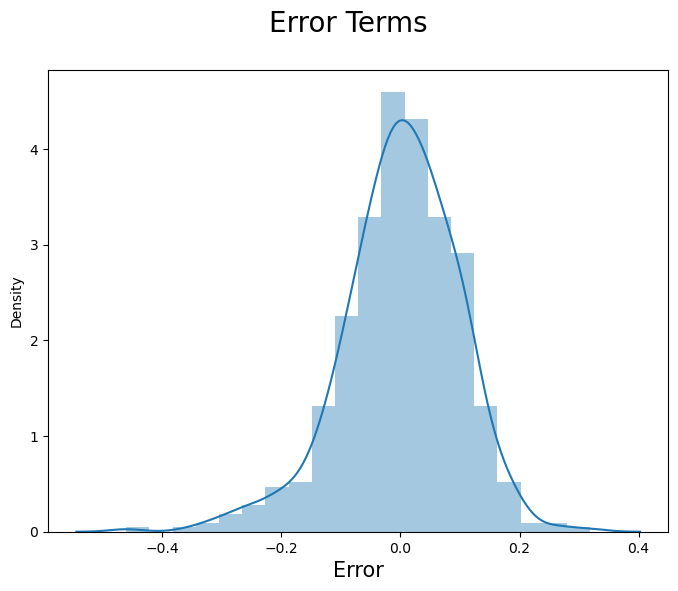

In [142]:
# Residual analysis of the Training set. 
fig = plt.figure(figsize = (8,6))
sns.distplot((y_train-y_train_pred), bins = 20)
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel("Error", fontsize=15)
plt.show()

#### Analysis
Above histrogram plot clearly shows the Errors terms are nornally distributed and mean is close to 0. This shows that the Linear regression assumption is valid for our model.

### <font color = 'orange'> Step 5: Prediction and evaluation on the test set </font>

#### Prepare the test set for testing the model.

In [144]:
# Now, we are going to use the model and predict & evaluate it on test set.
# Appy scaler on the test set numeric variables
bike_test[num_cols] = bike_scale.transform(bike_test[num_cols])


In [146]:
# Divide the Test set into X and y 
y_test = bike_test.pop("cnt")
X_test = bike_test

In [148]:
# Check the columns from the final train model 
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_9',
       'mnth_11', 'mnth_12', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [150]:
# Update the test set with the same columns from the final model
X_test = X_test[X_train_rfe.columns]

In [152]:
# Adding a constant to the test model 

bike_test_lm = sm.add_constant(X_test)


In [154]:
# Generate predictions based on trained model on test set.
y_test_pred = bike_lm5.predict(bike_test_lm)

#### Evaluating the model

Text(0, 0.5, 'y_test_pred')

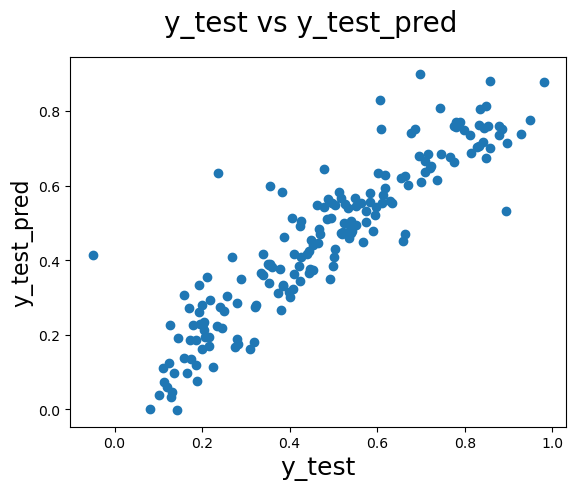

In [161]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)         # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   

In [163]:
# Above scatter plot shows the linear relation between actual and predicted values.

#### R-squared values for test set
- R-square score can be calulcate using the r2_score function
- Adjusted R-square will be calculated using below formula.
    - adjusted r^2 = 1 - ((1 - R²)*(n - 1) / (n - p - 1)).
    - Here n = # of dataset in test set, p = # of  predictor / independent variables, R = r-square value for test set.


In [174]:
# Calculating r-squared value for test set
r2_test = r2_score(y_test, y_test_pred)
print(round(r2_test,3))

0.815


In [185]:
# Calculating the number of dataset/sample for test set and the number of parameters used for the model
n = X_test.shape[0]
p = X_test.shape[1]
print("# of samaple data: ",n)
print("# of features/variables: ",p)

# of samaple data:  183
# of features/variables:  11


In [209]:
# Let's find the adjusted R-squared value for test set.
# print((1-r2_test))
r2_score_adjusted = 1- ((1-r2_test)*(n-1)/(n-p-1))
print(round(r2_score_adjusted,3))

0.803


#### R2 score comparison
- Train data
    - R2_score = 0.824
    - R2_score_adjusted = 0.820
- Test Data
    - R2_score = 0.815
    - R2_score_adjusted = 0.803

Difference in R2_score and adjusted R2_score between train and test in less than 5%. 
That means that model is good and generalize the dataset very well.

### <font color = 'orange'> Step 6: Model Analysis </font>
#### R-square Analysis
- Anysis shows that the difference in respective R-square and adjusted R-square values for the test and train set is less than 5%.
- That means, the model is good and very well generalizes the data set.

#### p-value Analysis
- p-values for all the predicter/independent variables (features) are less than 0.05 for train set.
- That means that all the predictor variables in the final model are statistically significant in detemning the value of target variable.

#### F-Statistics Analysis
- The F-Statistics values are high and Prob(F-Statistics) values are pretty low.
- This means that the regression model very well explains the variance in the target variable.

#### Coefficients
Based on the coefficient's value the equation is below
`cnt` =  0.0668 + (0.2436 * yr) - (0.0886 * holiday) + (0.5738 * temp) - (0.0967 * windspeed) + (0.0942 * season_2) + (0.1736 * season_4) +
  (0.0969 * mnth_9) - (0.0525 * mnth_11) - (0.0596 * mnth_12) - (0.0822 * weathersit_2) - (0.2622 * weathersit_3)

- Positive coefficient value for a variable indicates that a unit increase in the variable increases the bike hire numbers by the respective
  coefficient value unit.
- Negative coefficient value for a variable indicates that a unit increase in the variable decreases the bike hire numbers by the respective
  coefficient value unit.
- Top 3 coefficients significantly impacting the target variables are
    - `temp`:         - Coef value is 0.5738
    - `yr`:           - Coef value is 0.2436
    - `weathersit_3`: - Coef value is -0.2622